In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv('Google_Stock_Price.csv')

# Keep only 'Date' and 'Close' columns
df = df[['Date', 'Close']]

# Convert 'Date' to a DateTime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Handle missing values (if any) in 'Close'
df['Close'] = df['Close'].fillna(method='ffill')

df['Close'] = df['Close'].str.replace(',', '').astype(float)

# Convert to numpy array
dataset = np.array(df)

# Reshape the dataset as required by LSTM/GRU models
# For example, if you want to reshape for sequence length of 1
# dataset = dataset.reshape(-1, 1, 1)

# Display the first few rows of the dataframe
print(df.head())


             Close
Date              
2012-01-03  663.59
2012-01-04  666.45
2012-01-05  657.21
2012-01-06  648.24
2012-01-09  620.76


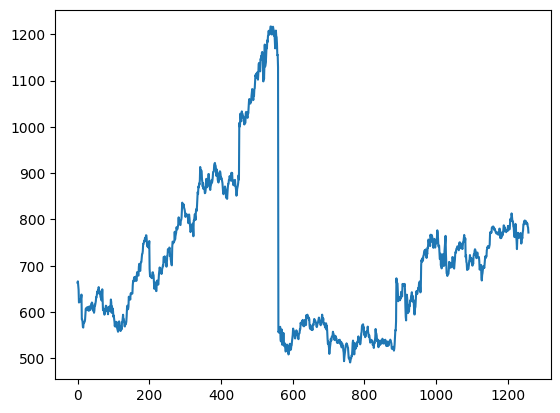

In [22]:
plt.plot(dataset)

In [23]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
print(len(dataset))

1258


In [24]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train=dataset[:train_size,:]
test = dataset[train_size:len(dataset), :]

def getdata(data,lookback):
    X,Y=[],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X),np.array(Y).reshape(-1,1)
lookback=1
X_train,y_train=getdata(train,lookback)
X_test,y_test=getdata(test,lookback)
print(X_test)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

[[0.18702369]
 [0.20708901]
 [0.21256012]
 [0.20831553]
 [0.20390557]
 [0.21003817]
 [0.2142552 ]
 [0.22201397]
 [0.22044293]
 [0.23502336]
 [0.23565729]
 [0.24103193]
 [0.21923019]
 [0.20866006]
 [0.22131114]
 [0.29050618]
 [0.30536224]
 [0.29945013]
 [0.30559652]
 [0.31106762]
 [0.30264735]
 [0.31684192]
 [0.31828894]
 [0.32648871]
 [0.33081598]
 [0.33427504]
 [0.32205118]
 [0.32677811]
 [0.33653515]
 [0.33078842]
 [0.31117787]
 [0.3276601 ]
 [0.32261621]
 [0.34287447]
 [0.34068327]
 [0.36575114]
 [0.36489671]
 [0.35428524]
 [0.35410609]
 [0.35701391]
 [0.34645756]
 [0.38013864]
 [0.37371663]
 [0.360156  ]
 [0.37982167]
 [0.37491559]
 [0.37370285]
 [0.35887436]
 [0.35591141]
 [0.3413172 ]
 [0.3535824 ]
 [0.34756005]
 [0.36780453]
 [0.35587007]
 [0.34192357]
 [0.3535824 ]
 [0.3566556 ]
 [0.35708281]
 [0.35445062]
 [0.37389579]
 [0.3933134 ]
 [0.38559596]
 [0.36889324]
 [0.3454102 ]
 [0.34643   ]
 [0.34786324]
 [0.32411835]
 [0.30769125]
 [0.3098411 ]
 [0.32367736]
 [0.2885217 ]
 [0.30

In [25]:
lstm=Sequential()
lstm.add(LSTM(2,input_shape=(1,lookback)))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error',optimizer='adam')

gru=Sequential()
gru.add(GRU(2,input_shape=(1,lookback)))
gru.add(Dense(1))
gru.compile(loss='mean_squared_error',optimizer='adam')

rnn=Sequential()
rnn.add(SimpleRNN(2,input_shape=(1,lookback)))
rnn.add(Dense(1))
rnn.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
lstm.summary()
gru.summary()
rnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2)                 32        
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 2)                 30        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                              

In [27]:
num_epochs=3
batches=3

lstm.fit(X_train, y_train, epochs=num_epochs, batch_size=batches)
gru.fit(X_train, y_train, epochs=num_epochs, batch_size=batches)
rnn.fit(X_train, y_train, epochs=num_epochs, batch_size=batches)


Epoch 1/3
314/314 [==============================] - 2s 2ms/step - loss: 0.0595
Epoch 2/3
314/314 [==============================] - 1s 2ms/step - loss: 0.0247
Epoch 3/3
314/314 [==============================] - 1s 3ms/step - loss: 0.0084
Epoch 1/3
314/314 [==============================] - 2s 2ms/step - loss: 0.0483
Epoch 2/3
314/314 [==============================] - 1s 3ms/step - loss: 0.0191
Epoch 3/3
314/314 [==============================] - 1s 3ms/step - loss: 0.0055
Epoch 1/3
314/314 [==============================] - 1s 2ms/step - loss: 0.0151
Epoch 2/3
314/314 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 3/3
314/314 [==============================] - 1s 2ms/step - loss: 0.0028


10/10 [==============================] - 0s 1ms/step


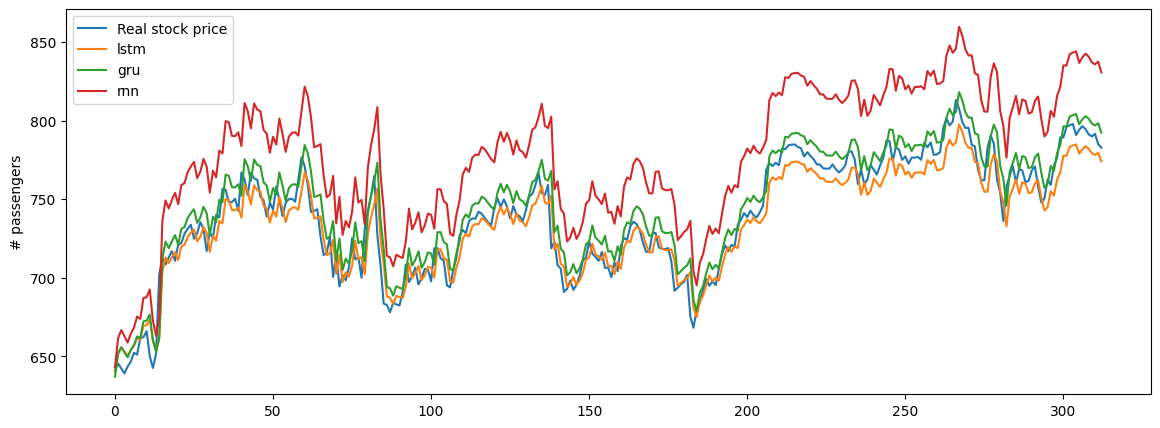

In [28]:
lstm_pred=lstm.predict(X_test)
gru_pred=gru.predict(X_test)
rnn_pred=rnn.predict(X_test)
y_test=scaler.inverse_transform(y_test)
lstm_pred=scaler.inverse_transform(lstm_pred)
gru_pred=scaler.inverse_transform(gru_pred)
rnn_pred=scaler.inverse_transform(rnn_pred)
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real stock price')
plt.plot(lstm_pred, label = 'lstm')
plt.plot(gru_pred, label = 'gru')
plt.plot(rnn_pred, label = 'rnn')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,lstm_pred))
print(mean_squared_error(y_test,gru_pred))
print(mean_squared_error(y_test,rnn_pred))

122.98022259013307
165.24362800123
1673.0853183181036
